
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [39]:
#
# Import relevant Libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [40]:
print (tf.__version__)
from keras.layers import Input,Dense
from keras.models import Model
from keras.datasets import mnist
# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.
(x_train,_),(x_test,_)=mnist.load_data()

2.14.0


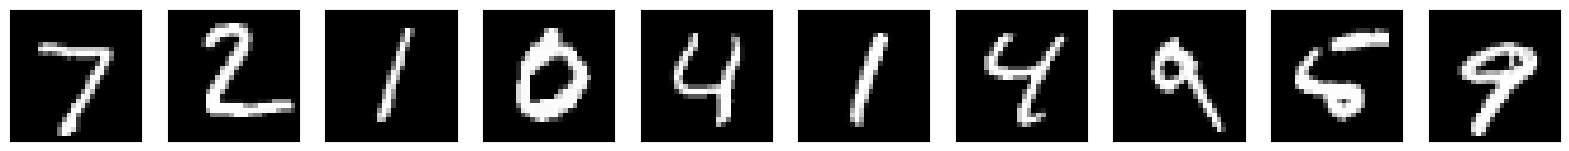

In [41]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [42]:
# Normalize train data - Divide by 255
x_train=x_train/255.0
# Normalize test data - Divide by 255
x_test=x_test/255.0

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(360, activation='relu', input_shape=(x_train.shape[1],)))
encoder.add(Dense(300,activation='relu'))
encoder.add(Dense(120,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(50,activation='relu'))
#
# Add as many hidden layers in the encoder network of your choise
#
#

# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.
#

In [44]:
print(encoder.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 360)               282600    
                                                                 
 dense_28 (Dense)            (None, 300)               108300    
                                                                 
 dense_29 (Dense)            (None, 120)               36120     
                                                                 
 dense_30 (Dense)            (None, 50)                6050      
                                                                 
 dense_31 (Dense)            (None, 50)                2550      
                                                                 
Total params: 435620 (1.66 MB)
Trainable params: 4356

In [7]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
#
decoder.add(Dense(120,activation='relu'))
decoder.add(Dense(300,activation='relu'))
decoder.add(Dense(360,activation='relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [8]:
# print the decoder model
print(decoder.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                1300      
                                                                 
 dense_6 (Dense)             (None, 120)               6120      
                                                                 
 dense_7 (Dense)             (None, 300)               36300     
                                                                 
 dense_8 (Dense)             (None, 360)               108360    
                                                                 
 dense_9 (Dense)             (None, 784)               283024    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 435104 (1.66 MB)
Trainable params: 43510

In [9]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.

In [10]:
# print the autoencoder model
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 25)                434345    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            435104    
                                                                 
Total params: 869449 (3.32 MB)
Trainable params: 869449 (3.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.
autoencoder.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
#x_train.shape,x_test.shape
autoencoder.fit(x_train, x_train, epochs=20, validation_data=[x_test, x_test])

Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1150 - accuracy: 0.2527 - val_loss: 0.1104 - val_accuracy: 0.2515
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1062 - accuracy: 0.2677 - val_loss: 0.1032 - val_accuracy: 0.2714
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1021 - accuracy: 0.2761 - val_loss: 0.1009 - val_accuracy: 0.2782
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0999 - accuracy: 0.2823 - val_loss: 0.0992 - val_accuracy: 0.2797
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0982 - accuracy: 0.2863 - val_loss: 0.0978 - val_accuracy: 0.2745
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0968 - accuracy: 0.2891 - val_loss: 0.0971 - val_accuracy: 0.2843
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0955 - accuracy: 0.2921 - val_loss: 0.0965 - val_ac

313/313 [==============================] - 2s 7ms/step


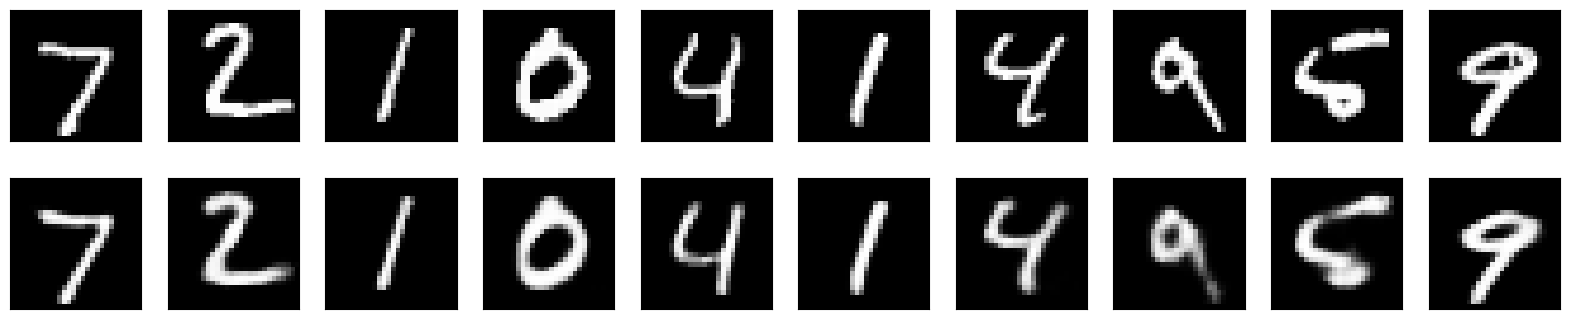

In [37]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # 
    # Display original image - Just line sample code provided earlier.
    #
    
    # 
    # Display reconstruced (decoded) images. You need to slightly change your code.
    #
    ax = plt.subplot(2, n, i + 1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
from tensorflow.keras.layers import GaussianNoise

In [22]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

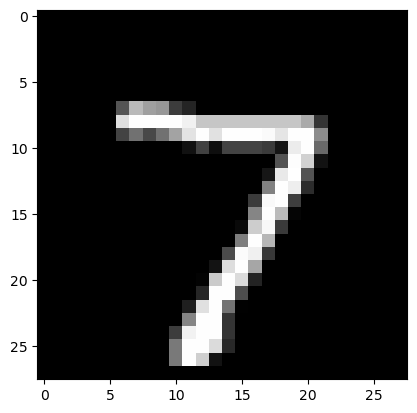

In [23]:
plt.imshow(x_test[0])

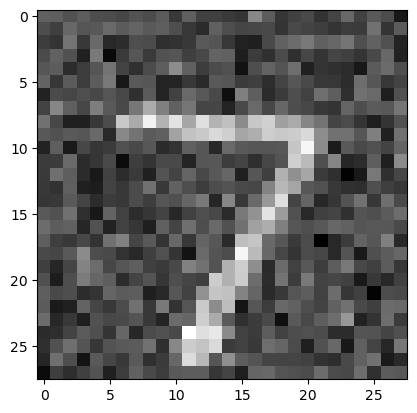

In [24]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [29]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(360, activation='relu', input_shape=(x_train.shape[1],)))
encoder.add(Dense(300,activation='relu'))
encoder.add(Dense(120,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))
# We are adding noise to make input as noisy image
#
# Add layers of encoder network. You could use same number of layers as earlier.
#


In [30]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(120,activation='relu'))
decoder.add(Dense(300,activation='relu'))
decoder.add(Dense(360,activation='relu'))


#
# Add layers of decoder network. You could use same number of layers as earlier.
#

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [31]:
noise_remover = Sequential([encoder, decoder])

In [32]:
# Compile the network as earlier
noise_remover.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
# Fit the network as earlier.
noise_remover.fit(x_train, x_train, epochs=20, validation_data=[x_test, x_test])

Epoch 1/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1759 - accuracy: 0.1747 - val_loss: 0.1356 - val_accuracy: 0.2229
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1318 - accuracy: 0.2290 - val_loss: 0.1237 - val_accuracy: 0.2344
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1241 - accuracy: 0.2411 - val_loss: 0.1186 - val_accuracy: 0.2496
Epoch 4/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1189 - accuracy: 0.2495 - val_loss: 0.1139 - val_accuracy: 0.2455
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1149 - accuracy: 0.2555 - val_loss: 0.1103 - val_accuracy: 0.2615
Epoch 6/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1111 - accuracy: 0.2615 - val_loss: 0.1056 - val_accuracy: 0.2685
Epoch 7/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1082 - accuracy: 0.2660 - val_loss: 0.1039 - val_

In [35]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


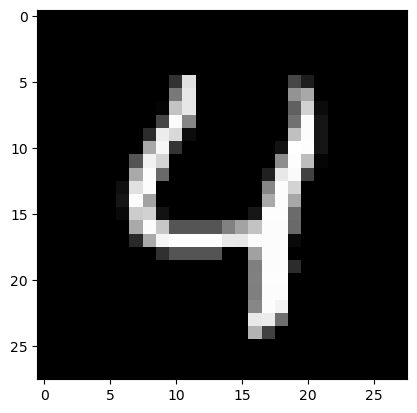

The Noisey Version


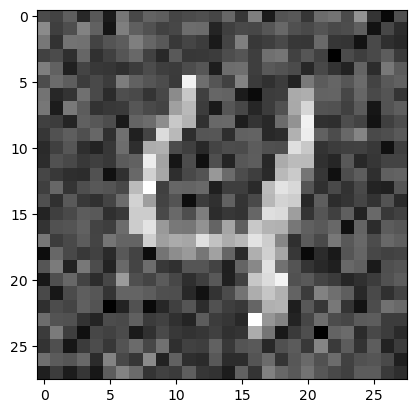

After going through denoiser


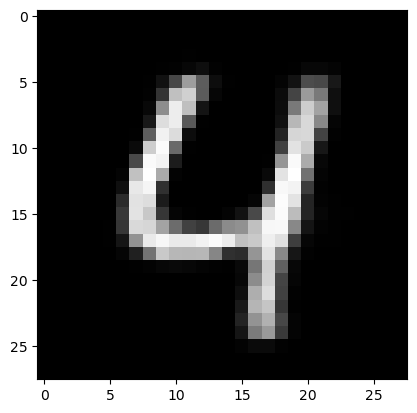

In [36]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.